# Линейная регрессия

На сегодняшнем занятии будем работать с датасетом BlackFriday (ниже есть его описание):

https://www.kaggle.com/mehdidag/black-friday/version/1

Description
The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Подготовка данных

In [3]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

Поэтому можем заменить эти пропущенные значения на 0.

In [4]:
data.fillna(0, inplace=True)

In [5]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


Посмотрим, какие типы данных есть в нашем датасете. 

Выведите на экран тип каждой колонки в таблице.

In [6]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Обработаем нечисловые колонки.

1) Выведите на экран все возможные значения из столбца Gender.

2) Замените значение 'M' на 1, а 'F' на 0.

In [7]:
data['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
537572    M
537573    M
537574    M
537575    M
537576    M
Name: Gender, Length: 537577, dtype: object

In [8]:
data['Gender'].replace(['F', 'M'], [0, 1], inplace=True)

In [9]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,1,36-45,16,C,1,0,1,2.0,0.0,11664
537573,1004737,P00111142,1,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,1,36-45,16,C,1,0,8,15.0,0.0,8043
537575,1004737,P00285842,1,36-45,16,C,1,0,5,0.0,0.0,7172


Поработаем со столбцом Age.

1) Выведите на экран все возможные значения из столбца Age.

2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.

In [29]:
pd.unique(data['Age'])

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [33]:
sorted(list(pd.unique(data['Age'])))

['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [34]:
data['Age'].replace(sorted(list(pd.unique(data['Age']))), np.arange(len(pd.unique(data['Age']))), inplace = True)

In [35]:
data['Age']

0         0
1         0
2         0
3         0
4         6
         ..
537572    3
537573    3
537574    3
537575    3
537576    3
Name: Age, Length: 537577, dtype: int64

Обработаем столбец City_Category.

1) Выведите все уникальные значения данного столбца.

2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).

In [36]:
pd.unique(data['City_Category'])

array(['A', 'C', 'B'], dtype=object)

In [74]:
data['City_Category'] = pd.get_dummies(data['City_Category'])

In [75]:
data['City_Category']

0         1
1         1
2         1
3         1
4         0
         ..
537572    0
537573    0
537574    0
537575    0
537576    0
Name: City_Category, Length: 537577, dtype: uint8

Наконец, обработаем Stay_In_Current_City_Years.

1) Выведите на экран все уникальные значения данного столбца.

2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).

In [38]:
pd.unique(data['Stay_In_Current_City_Years'])

array(['2', '4+', '3', '1', '0'], dtype=object)

In [39]:
data['Stay_In_Current_City_Years'].replace('4+', 4, inplace = True)

In [41]:
data['Stay_In_Current_City_Years'].astype(int)

0         2
1         2
2         2
3         2
4         4
         ..
537572    1
537573    1
537574    1
537575    1
537576    1
Name: Stay_In_Current_City_Years, Length: 537577, dtype: int64

In [42]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,C,4,0,8,0.0,0.0,7969


Удалим столбцы User_ID и Product_ID.

In [44]:
data.drop(['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [80]:
data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,1,2,0,3,0.0,0.0,8370
1,0,0,10,1,2,0,1,6.0,14.0,15200
2,0,0,10,1,2,0,12,0.0,0.0,1422
3,0,0,10,1,2,0,12,14.0,0.0,1057
4,1,6,16,0,4,0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1,3,16,0,1,0,1,2.0,0.0,11664
537573,1,3,16,0,1,0,1,15.0,16.0,19196
537574,1,3,16,0,1,0,8,15.0,0.0,8043
537575,1,3,16,0,1,0,5,0.0,0.0,7172


# Исследование данных

1. Как влияет пол на целевую переменную Purchase? Постройте диаграмму.

2. Как влияет возраст на целевую переменную Purchase? Постройте диаграмму.

3. Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму.

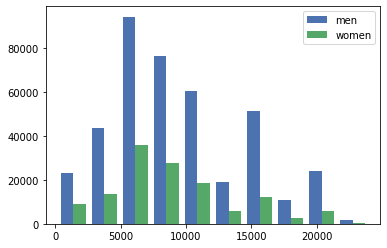

In [63]:
a=data[(data.Gender == 1)]
b=data[(data.Gender == 0)]

import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

x = a.Purchase
y = b.Purchase

plt.hist([x, y], label=['men', 'women'])
plt.legend(loc='upper right')
plt.show()

Нарисуйте матрицу корреляций признаков.

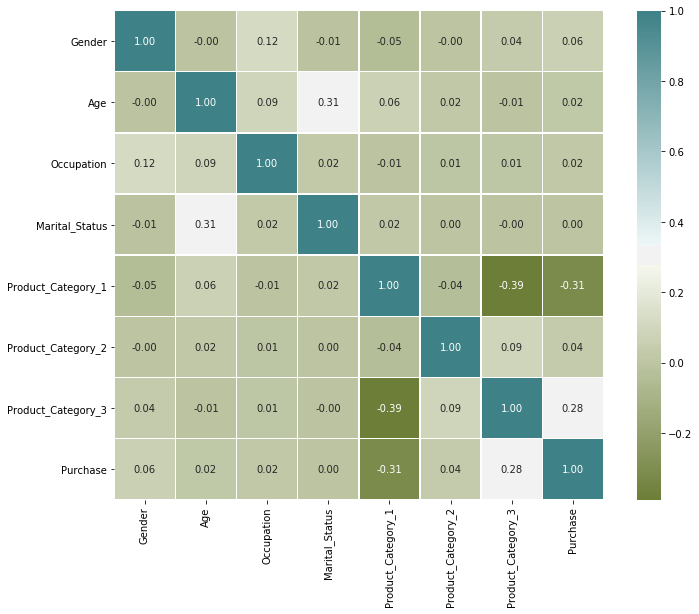

In [62]:
plt.figure(figsize=(12,9))

corr = data.corr()
sns.heatmap(corr, annot=True, linewidths=.5, fmt= '.2f', mask=np.zeros_like(corr, dtype=np.bool), \
            cmap=sns.diverging_palette(100,200, as_cmap=True), square=True);

# Построение модели

In [78]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X = data.copy()

y = data['Purchase']
del X['Purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
print(y_pred)

[12561.47608761 10086.55351461  7775.05098385 ...  8589.16966916
  8693.55235666  8783.96212728]


In [81]:
r2_score(ytest,ypred), mean_squared_error(ytest,ypred)

NameError: name 'ypred' is not defined

Добавим L1 регуляризацию.

In [82]:
from sklearn.linear_model import Lasso

for a in np.arange(0.1, 100.1, 25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(X_train, y_train)

    y_pred2 = regressor2.predict(X_test)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(y_test,y_pred2), mean_squared_error(y_test, y_pred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.13250712644691032 21542998.362218615
[  207.71786037   156.48866365    39.69989339  -157.50201563
    13.68618991   -25.24712111 -1202.90208189    53.50163364
   927.09700896] 

alpha=25.1
Scores: 0.13233509741759475 21547270.467742223
[  186.44085542   126.33278898    20.7143311   -136.18778068
     0.            -0.         -1184.68499844    31.44157174
   912.71394116] 

alpha=50.1
Scores: 0.13188831336875084 21558365.73817723
[  164.78776665   104.18374111     1.22705948  -114.59674216
     0.            -0.         -1166.42978657     9.24082118
   898.26494908] 

alpha=75.1
Scores: 0.13130480896147467 21572856.271613903
[  141.06317972    80.11620451     0.           -92.6609061
     0.            -0.         -1147.98239056     0.
   882.58183391] 



**Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.**

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [83]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17

In [84]:
lasso_cv.coef_

array([ 482.2119241 ,  116.00259102,    6.43215431, -360.30397465,
          9.66338523,  -47.93733444, -318.54528433,    8.55350351,
        149.07620477])

In [85]:
lasso_cv.alpha_

0.1

In [87]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(X_train, y_train)

y_pred2 = regressor2.predict(X_test)

print('Scores:', r2_score(y_test, y_pred2), mean_squared_error(y_test, y_pred2))

Scores: 0.13250712644691032 21542998.362218615


Добавим L2 регуляризацию.

In [89]:
from sklearn.linear_model import Ridge

for a in np.arange(-10, 10.1, 2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(X_train, y_train)

    y_pred3 = regressor3.predict(X_test)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(y_test, y_pred3), mean_squared_error(y_test, y_pred3))
    print(regressor3.coef_)

alpha=-10.0
Scores: 0.13250704906296373 21543000.283943027
[  207.80636017   156.62559391    39.77437713  -157.58942767
    13.77894122   -25.39098298 -1202.99341184    53.58786674
   927.16868008]
alpha=-7.5
Scores: 0.13250706028136128 21543000.005349476
[  207.80551699   156.6241867     39.77445663  -157.58883721
    13.77891826   -25.39053383 -1202.98759187    53.58809477
   927.16557998]
alpha=-5.0
Scores: 0.13250707149473484 21542999.72688069
[  207.80467382   156.62277952    39.77453613  -157.58824676
    13.7788953    -25.39008468 -1202.98177196    53.58832279
   927.16247989]
alpha=-2.5
Scores: 0.13250708270308464 21542999.44853666
[  207.80383066   156.62137236    39.77461562  -157.58765631
    13.77887235   -25.38963555 -1202.97595211    53.5885508
   927.15937981]
alpha=0.0
Scores: 0.13250709390641102 21542999.17031738
[  207.80298751   156.61996523    39.77469511  -157.58706586
    13.77884939   -25.38918643 -1202.97013233    53.58877881
   927.15627974]
alpha=2.5
Scores: 0

**Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).**

Теперь подберем оптимальное a по кросс-валидации.

In [90]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

KeyboardInterrupt: 

In [ ]:
ridge_cv.alpha_

In [ ]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(X_train, y_train)

y_pred3 = regressor3.predict(X_test)

print('Scores:', r2_score(y_test, y_pred3), mean_squared_error(y_test, y_pred3))


Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [96]:
from sklearn.linear_model import ElasticNet

regr = ElasticNet(alpha = 1, l1_ratio = 0.4, random_state = 0)
regr.fit(X_train, y_train)
y_pred4 = regr.predict(X_test)

print(r2_score(y_test, y_pred4), mean_squared_error(y_test, y_pred4))

0.12088584874451769 21831596.890393395


Посмотрим на веса, которые присвоила линейная регрессия признакам.

In [97]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,207.802988
1,Age,156.619965
2,Occupation,39.774695
3,City_Category,-157.587066
4,Stay_In_Current_City_Years,13.778849
5,Marital_Status,-25.389186
6,Product_Category_1,-1202.970132
7,Product_Category_2,53.588779
8,Product_Category_3,927.156280


In [98]:
len(data),len(Xtest)

(537577, 177401)

# Feature Ingineering

Попробуйте соорудить новые признаки.

Идеи:

1) Группировка исходных признаков по бинам
(попробуйте сгруппировать числовые признаки, например, Product_Category_1(2,3))

2) Перемножение признаков, которые в паре могут влиять на результат (линейная регрессия не умеет умножать)

3) Взятие других функций от признаков.

4) Счётчики.

In [ ]:
#your code here

In [ ]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [ ]:
data['age_average'] = list(map(code_mean(data.iloc[ind_train], 'Age', "Purchase").get, data.Age))